In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\neell\Downloads\flipkart_r_data (1).csv")

In [3]:
data

,Unnamed: 0,Brand,Model ID,LED Model,Inches,YEAR,Selling Price,Original Cost,Discount,Profit Margin,Inches_numeric
0,0,XIAOMI,L43MB-AIN,LEDModel,43,2025,23999,37999,36,14000,43.0
1,1,XIAOMI,L32MB-FIN,LEDModel,32,2025,10499,24999,58,14500,32.0
2,2,Samsung,UA32H4500FUXX,LEDModel,32,2025,12990,17900,27,4910,32.0
3,3,Samsung,UA43UE84AFULX,LEDModel,43,2025,25750,41300,37,15550,43.0
4,4,LG,UR7500PSC,LEDModel,43,2023,24999,49990,49,24991,43.0
...,...,...,...,...,...,...,...,...,...,...,...
465,465,LG,UN7190PTA,LEDModel,55,2019,70200,79990,12,9790,55.0
466,466,LG,NANO80SQA,LEDModel,55,2022,64990,100990,35,36000,55.0
467,467,LG,OLED65G2PSA,OLEDModel,65,2022,219990,399990,45,180000,65.0
468,468,LG,UN7300PTC,LEDModel,65,2020,111990,129990,13,18000,65.0


In [7]:
#data.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [4]:
data.describe()

,Unnamed: 0,YEAR,Selling Price,Original Cost,Discount,Profit Margin,Inches_numeric
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,469.000000
mean,234.500000,2022.838298,77682.336170,135202.142553,38.853191,57519.806383,53.936034
std,135.821574,2.094622,74640.633146,131855.157241,14.729029,80928.381879,12.796741
min,0.000000,2016.000000,8999.000000,1811.000000,2.000000,-394910.000000,24.000000
25%,117.250000,2022.000000,31660.000000,47990.000000,30.000000,15903.250000,43.000000
50%,234.500000,2023.000000,53334.500000,87400.000000,37.000000,31870.500000,55.000000
75%,351.750000,2025.000000,98644.750000,187650.000000,46.000000,80291.000000,65.000000
max,469.000000,2025.000000,549990.000000,949900.000000,79.000000,616982.000000,98.000000


In [4]:
data["Original Cost"].max()

949900

In [5]:
data.describe(include='object')

,Brand,Model ID,LED Model,Inches
count,470,470,470,470
unique,5,359,7,16
top,Samsung,L43MB-AIN,LEDModel,55
freq,196,20,308,113


In [6]:
data.isnull().sum()


Unnamed: 0        0
Brand             0
Model ID          0
LED Model         0
Inches            0
YEAR              0
Selling Price     0
Original Cost     0
Discount          0
Profit Margin     0
Inches_numeric    1
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      470 non-null    int64  
 1   Brand           470 non-null    object 
 2   Model ID        470 non-null    object 
 3   LED Model       470 non-null    object 
 4   Inches          470 non-null    object 
 5   YEAR            470 non-null    int64  
 6   Selling Price   470 non-null    int64  
 7   Original Cost   470 non-null    int64  
 8   Discount        470 non-null    int64  
 9   Profit Margin   470 non-null    int64  
 10  Inches_numeric  469 non-null    float64
dtypes: float64(1), int64(6), object(4)
memory usage: 40.5+ KB


# 1. Compare average selling prices by brand and model type

In [12]:
# Compare average selling prices by brand and model type
Brand_modelid_avgsp=data.groupby(['Brand','Model ID'])['Selling Price'].mean()
Brand_modelid_avgsp

Brand   Model ID  
LG      LM5600PTC     32234.0
        LM560BPTC     18999.5
        LM563BPTC     13590.0
        LM5650PTA     10953.0
        LM576BPTC     17004.0
                       ...   
XIAOMI  L55MB-AIN     33999.0
        L55MB-APIN    39499.0
        L55MB-FIN     29999.0
        L55MB-FPIN    32999.0
        L65MB-APIN    57999.0
Name: Selling Price, Length: 359, dtype: float64

In [10]:
plt.summer()

<Figure size 640x480 with 0 Axes>

In [109]:
pd.pivot_table(data,values="Selling Price",index="Model ID",columns="Brand",aggfunc="mean").max()

Brand
LG           222990.0
Panasonic    131850.0
SONY         545490.0
Samsung      549990.0
XIAOMI        57999.0
dtype: float64

Text(0.5, 1.0, 'Brands Price')

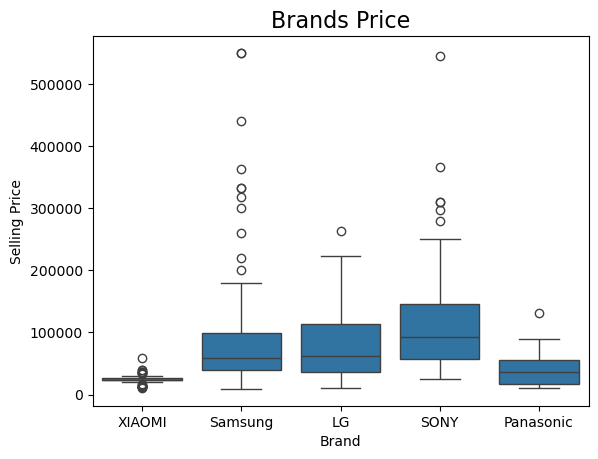

In [20]:
sns.boxplot(x='Brand', y='Selling Price', data=data)
plt.title("Brands Price",fontsize=16)

In [ ]:
# Brand Distribution
# Pie Chart – Top 5 States
plt.figure(figsize=(6,6))
data["State"].value_counts().head(5).plot.pie(
    autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel")
)
plt.title("Top 5 States by Vehicle Listings")
plt.ylabel("")
plt.show()

# Brands Distribution

Text(0.5, 1.0, 'Brands Distribution')

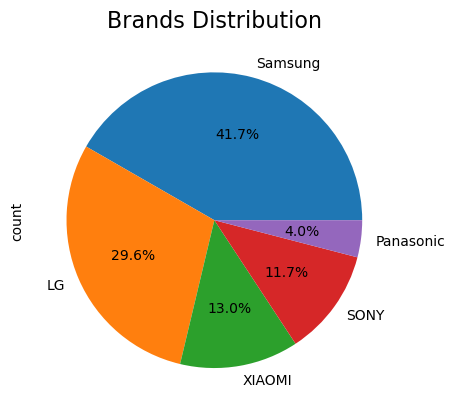

In [39]:
data["Brand"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Brands Distribution",fontsize=16)

# 2.Examine how discount % varies by brand AND year

In [3]:
# Examine how discount % varies by brand AND year
Brand_year_discount=data.groupby(['Brand','YEAR'])['Discount'].mean()
#Brand_year_discount

NameError: name 'data' is not defined

In [99]:
pd.pivot_table(data,values="Discount",index="Brand",columns="YEAR",aggfunc="mean").round(2)

YEAR,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Brand,,,,,,,,,,
LG,NaN,62.0,54.75,39.50,60.07,38.04,34.25,27.71,40.45,35.97
Panasonic,NaN,NaN,28.50,NaN,NaN,47.00,6.00,33.89,NaN,30.00
SONY,74.00,35.0,NaN,NaN,23.50,40.00,38.89,50.00,36.60,35.27
Samsung,72.33,71.5,71.75,70.67,44.10,35.92,41.33,33.75,42.86,31.21
XIAOMI,NaN,NaN,NaN,39.25,NaN,47.00,56.00,38.38,34.50,39.80


Text(0.5, 1.0, 'Brand Discounts Evalution overtime')

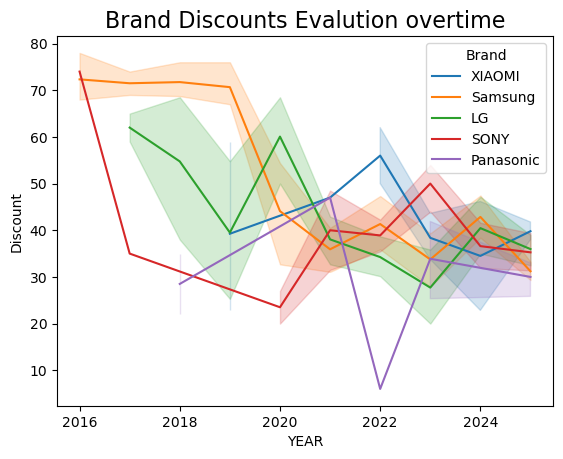

In [21]:
sns.lineplot(x='YEAR', y='Discount', hue='Brand', data=data)
plt.title("Brand Discounts Evalution overtime",fontsize=16)

In [117]:
# Compute profit margins (Selling Price - Cost Price)
data['Profit Margin'] = data['Original Cost'] - data['Selling Price']
data
#data.to_csv(r"C:\Users\neell\Downloads\flipkart_r_data (1).csv")

,Unnamed: 0,Brand,Model ID,LED Model,Inches,YEAR,Selling Price,Original Cost,Discount,Profit Margin,Inches_numeric
0,0,XIAOMI,L43MB-AIN,LEDModel,43,2025,23999,37999,36,14000,43.0
1,1,XIAOMI,L32MB-FIN,LEDModel,32,2025,10499,24999,58,14500,32.0
2,2,Samsung,UA32H4500FUXX,LEDModel,32,2025,12990,17900,27,4910,32.0
3,3,Samsung,UA43UE84AFULX,LEDModel,43,2025,25750,41300,37,15550,43.0
4,4,LG,UR7500PSC,LEDModel,43,2023,24999,49990,49,24991,43.0
...,...,...,...,...,...,...,...,...,...,...,...
465,465,LG,UN7190PTA,LEDModel,55,2019,70200,79990,12,9790,55.0
466,466,LG,NANO80SQA,LEDModel,55,2022,64990,100990,35,36000,55.0
467,467,LG,OLED65G2PSA,OLEDModel,65,2022,219990,399990,45,180000,65.0
468,468,LG,UN7300PTC,LEDModel,65,2020,111990,129990,13,18000,65.0


In [123]:
data.groupby("Brand")["Profit Margin"].mean().round(2).sort_values(ascending=False)

Brand
SONY         85173.95
LG           68406.29
Samsung      58317.80
Panasonic    20581.21
XIAOMI       16720.26
Name: Profit Margin, dtype: float64

# 3. Profit Margin by Brand

Text(0.5, 1.0, 'Brands Discount')

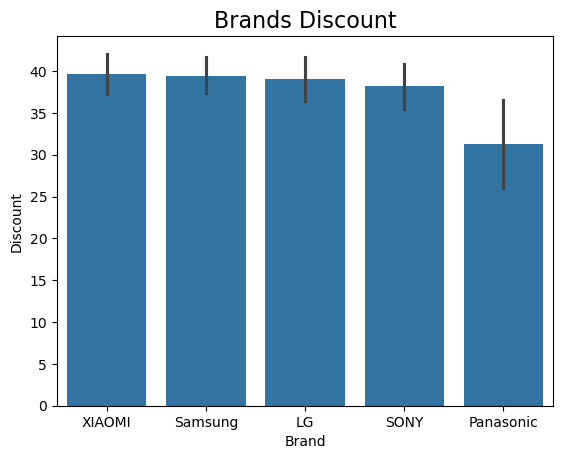

In [8]:
sns.barplot(x='Brand', y='Discount', data=data)
plt.title("Brands Discount",fontsize=16)

# 4.Identify which display technology (LED, QLED, OLED) gives higher margins

In [144]:
# Identify which display technology (LED, QLED, OLED) gives higher margins
display_margins = data.groupby('LED Model')['Selling Price'].mean().round(2).sort_values(ascending=False)
display_margins

LED Model
Mini LEDModel    275931.67
Neo QLEDModel    225730.00
OLEDModel        154863.02
QNEDModel        113942.25
NanoCellModel     97399.00
QLEDModel         76967.88
LEDModel          53319.18
Name: Selling Price, dtype: float64

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'LEDModel'),
  Text(1, 0, 'QLEDModel'),
  Text(2, 0, 'QNEDModel'),
  Text(3, 0, 'OLEDModel'),
  Text(4, 0, 'Neo QLEDModel'),
  Text(5, 0, 'Mini LEDModel'),
  Text(6, 0, 'NanoCellModel')])

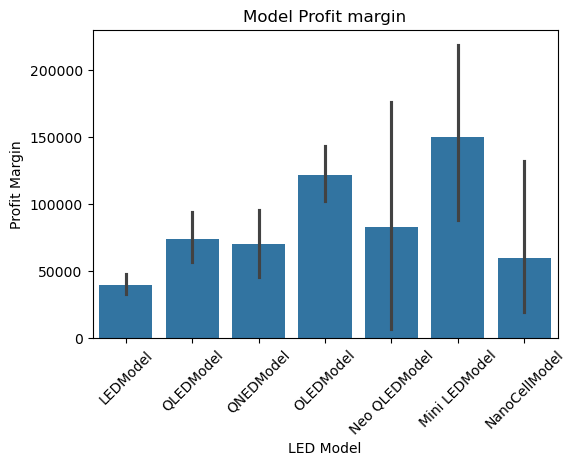

In [6]:
plt.figure(figsize=(6,4))
sns.barplot(x='LED Model', y='Profit Margin', data=data)
plt.title("Model Profit margin") 
plt.xticks(rotation=45)

# 5.Explore price trends by year and inches

In [148]:
# Explore price trends by year and inches
price_trends_year_inches = data.groupby(['YEAR','Inches'])['Selling Price'].mean()
price_trends_year_inches

YEAR  Inches 
2016  49          41301.500000
      55          81318.000000
      65          93203.000000
2017  55         104268.500000
      65         115426.333333
                     ...      
2025  75         189241.250000
      85         366990.000000
      86         231944.500000
      98         545490.000000
      Unknown     21999.000000
Name: Selling Price, Length: 66, dtype: float64

Text(0.5, 1.0, 'Price trends Year & Inches')

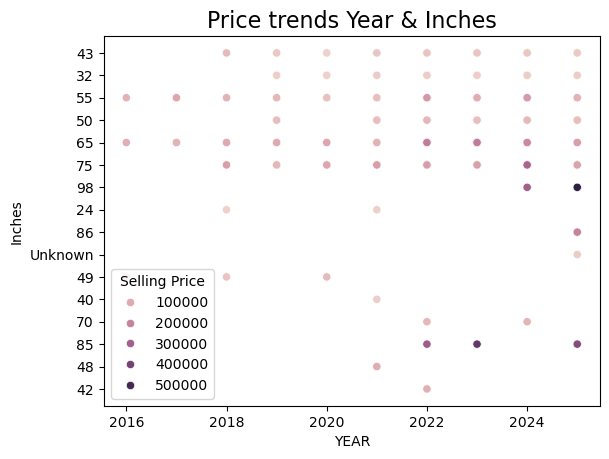

In [109]:
sns.scatterplot(data,x="YEAR",y="Inches",hue="Selling Price")
plt.title("Price trends Year & Inches",fontsize=16)


#sns.lineplot(x='Inches', y='Selling Price', hue='YEAR', data=data)

# 6. Explore price trends by Inches and Brand

Text(0.5, 1.0, 'Brands & Inches Price variation')

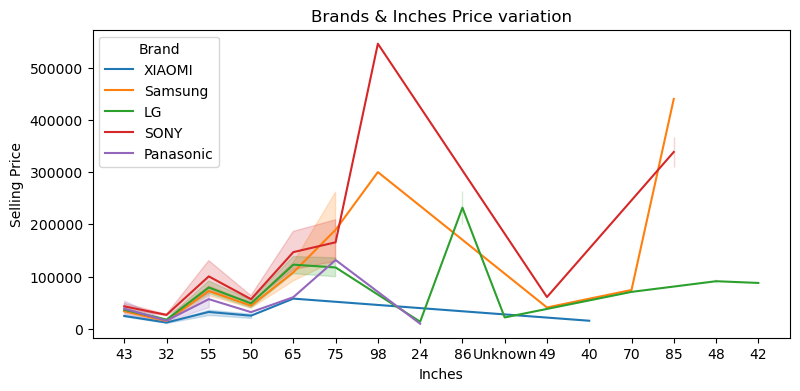

In [21]:
plt.figure(figsize=(9,4))
sns.lineplot(x='Inches', y='Selling Price', hue='Brand', data=data)
plt.title("Brands & Inches Price variation")

In [22]:
pd.pivot_table(data,values="Selling Price",index="Inches",columns="Brand",aggfunc="mean").round(2)

Brand,LG,Panasonic,SONY,Samsung,XIAOMI
Inches,,,,,
24,13835.00,9999.0,NaN,NaN,NaN
32,17696.58,15845.8,26886.33,15027.67,12291.86
40,NaN,NaN,NaN,NaN,15700.00
42,87990.00,NaN,NaN,NaN,NaN
43,36759.71,38757.4,43261.14,33978.50,24877.54
48,91279.00,NaN,NaN,NaN,NaN
49,NaN,NaN,60999.00,41073.67,NaN
50,48869.75,32150.0,56951.80,44514.75,25383.40
55,79292.43,56966.0,100525.09,72462.81,32515.00


# 7.YEARLY TREND IN Display types

Text(0.5, 1.0, 'Models overtime')

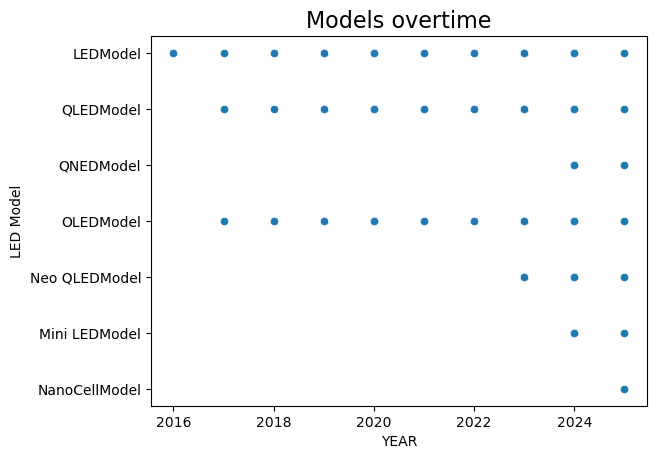

In [80]:
#YEARLY TREND IN Display types
sns.scatterplot(x='YEAR', y='LED Model',  data=data)
plt.title("Models overtime",
         fontsize=16)

# 8.Average selling vs. cost price per brand

In [150]:
# Average selling vs. cost price per brand
avg_sp_cp = data.groupby('Brand')[['Selling Price','Original Cost']].mean().round(2)
avg_sp_cp

,Selling Price,Original Cost
Brand,,
LG,79189.38,147595.68
Panasonic,41715.58,62296.79
SONY,125110.55,210284.49
Samsung,83228.04,141545.83
XIAOMI,24868.90,41589.16


Text(0, 0.5, 'Amount')

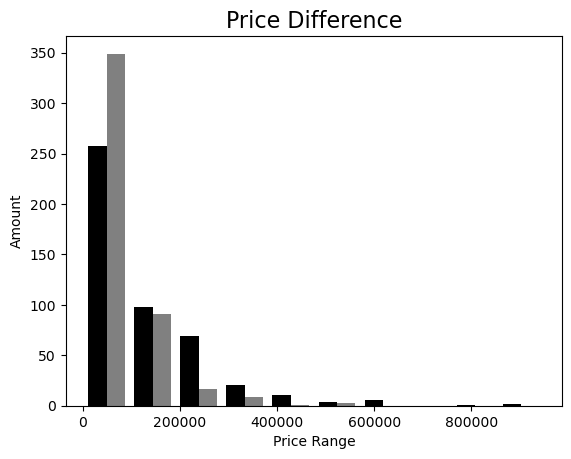

In [25]:
# original cost and selling cost price variation

plt.hist(data[['Original Cost','Selling Price']],bins=10,color=("black","grey"),orientation="vertical")
plt.title("Price Difference",fontsize=16)
plt.xlabel("Price Range")
plt.ylabel("Amount")

Text(0.5, 1.0, 'Price Difference')

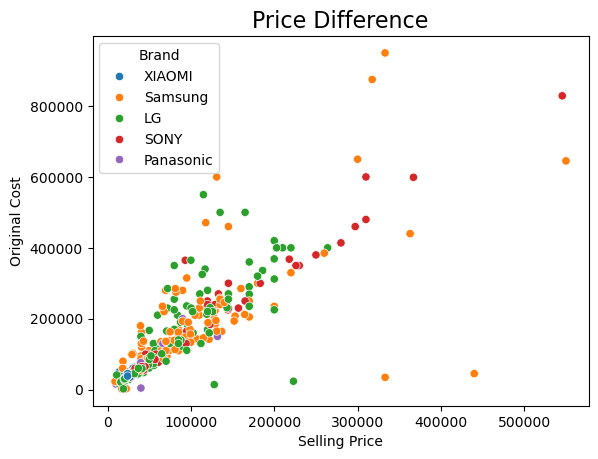

In [82]:
sns.scatterplot(x='Selling Price', y='Original Cost', hue='Brand', data=data)
plt.title("Price Difference",
         fontsize=16)

Text(0.5, 1.0, 'Price Difference')

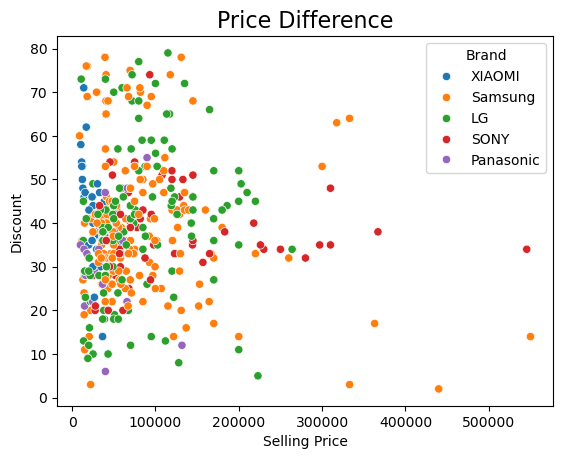

In [28]:
sns.scatterplot(x='Selling Price', y='Discount', hue='Brand', data=data)
plt.title("Price Difference",
         fontsize=16)

Text(0.5, 1.0, 'Price Variation on Inches')

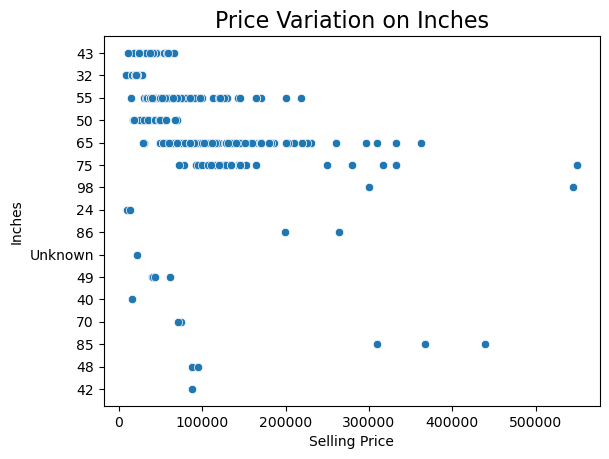

In [11]:
sns.scatterplot(x='Selling Price', y='Inches', data=data)
plt.title("Price Variation on Inches",
         fontsize=16)

Text(0.5, 1.0, 'Profit Margin vs Selling Price')

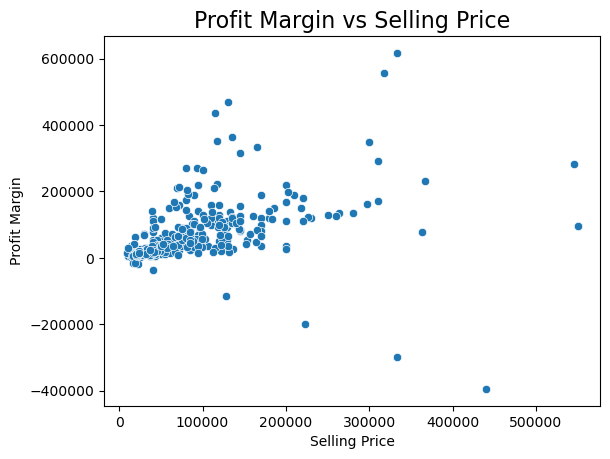

In [16]:
sns.scatterplot(x='Selling Price', y='Profit Margin', data=data)
plt.title("Profit Margin vs Selling Price",
         fontsize=16)

In [15]:
data.columns

Index(['Unnamed: 0', 'Brand', 'Model ID', 'LED Model', 'Inches', 'YEAR',
       'Selling Price', 'Original Cost', 'Discount', 'Profit Margin',
       'Inches_numeric'],
      dtype='object')

# 9.Compare discount trends by brand

In [153]:
# Compare discount trends by brand
discount_trends = data.groupby('Brand')['Discount'].mean().round(2).sort_values(ascending=False)
discount_trends

Brand
XIAOMI       39.70
Samsung      39.38
LG           39.04
SONY         38.18
Panasonic    31.32
Name: Discount, dtype: float64

([0, 1, 2, 3, 4],
 [Text(0, 0, 'XIAOMI'),
  Text(1, 0, 'Samsung'),
  Text(2, 0, 'LG'),
  Text(3, 0, 'SONY'),
  Text(4, 0, 'Panasonic')])

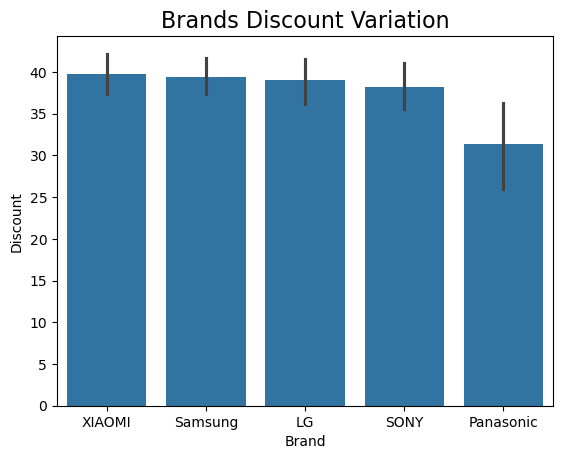

In [9]:
# Brand wise dicount variation
sns.barplot(x='Brand', y='Discount', data=data)
plt.title("Brands Discount Variation",fontsize=16)


# 10.Study which brands dominate certain screen sizes 

In [68]:
pd.crosstab(index=data["Brand"],columns=data["Inches"])

Inches,24,32,40,42,43,48,49,50,55,65,70,75,85,86,98,Unknown
Brand,,,,,,,,,,,,,,,,
LG,1,19,0,1,24,2,0,4,35,40,1,9,0,2,0,1
Panasonic,1,5,0,0,5,0,0,1,5,1,0,1,0,0,0,0
SONY,0,3,0,0,7,0,1,5,11,17,0,8,2,0,1,0
Samsung,0,12,0,0,28,0,3,24,54,54,1,18,1,0,1,0
XIAOMI,0,7,1,0,39,0,0,5,8,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Brands Screen Sizes')

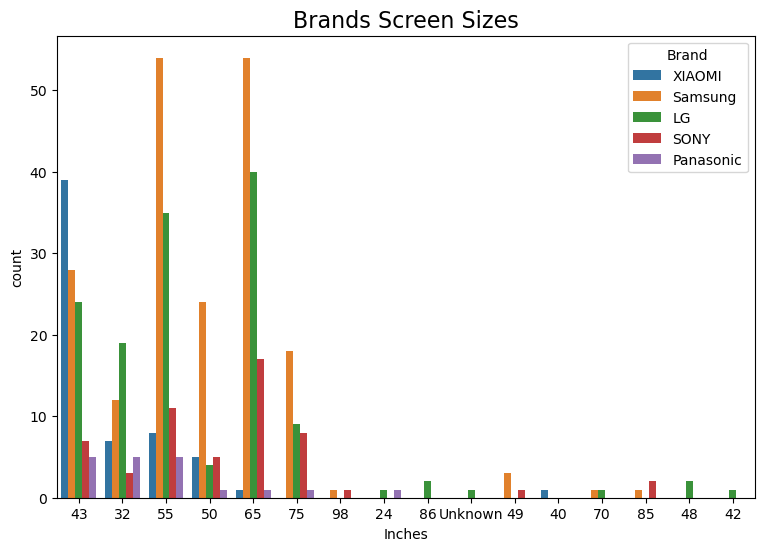

In [84]:
plt.figure(figsize=(9,6))
sns.countplot(data=data,x="Inches",hue="Brand") 
plt.title("Brands Screen Sizes", 
          fontsize=16,color='black',      
          loc='center') 

# 11.Study which brands dominate certain  display types

In [26]:
pd.crosstab(index=data["LED Model"],columns=data["Brand"])

Brand,LG,Panasonic,SONY,Samsung,XIAOMI
LED Model,,,,,
LEDModel,93,18,42,109,46
Mini LEDModel,0,0,6,0,0
NanoCellModel,4,0,0,0,0
Neo QLEDModel,0,0,0,15,0
OLEDModel,34,1,7,7,0
QLEDModel,0,0,0,65,15
QNEDModel,8,0,0,0,0


Text(0.5, 1.0, 'Brands Displays')

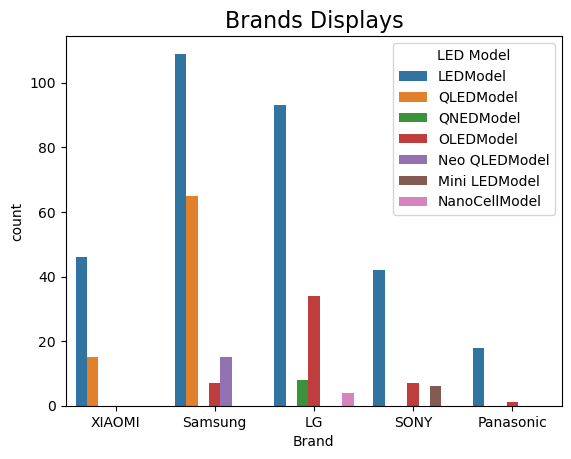

In [85]:
sns.countplot(data=data,x="Brand",hue="LED Model") #visual conveying wrong data
plt.title("Brands Displays", 
          fontsize=16,          
          color='black',      
          loc='center') 

In [13]:
data['Inches_numeric'] = data['Inches'].str.replace(' inch', '').str.replace(' Inch', '').replace('Unknown', np.nan).astype(float)
screen_size_brands = data.groupby('Brand')['Inches_numeric'].mean()
print(screen_size_brands)

Brand
LG           53.942029
Panasonic    45.473684
SONY         59.527273
Samsung      56.214286
XIAOMI       44.196721
Name: Inches_numeric, dtype: float64


In [48]:
#data['Inches_numeric'] = data['Inches'].str.replace('inch', '').str.replace('Inch', '').replace('Unknown', np.nan).astype(float)

In [57]:
#data["Inches"]=data["Inches"].str.replace(r'\s*inch(es)?', '', case=False, regex=True)

In [58]:
#data.to_csv(r"C:\Users\neell\Downloads\flipkart_r_data (1).csv")

# 12.Visualize which brand’s models are most recent (by year) and how they’re priced

In [27]:
# Visualize which brand’s models are most recent (by year) and how they’re priced
recent_model=data.groupby('Brand')['YEAR'].max()
recent_model

Brand
LG           2025
Panasonic    2025
SONY         2025
Samsung      2025
XIAOMI       2025
Name: YEAR, dtype: int64

In [8]:
b=pd.pivot_table(data,values="Selling Price",index="YEAR",columns="Brand",aggfunc="mean").round(2)
b

Brand,LG,Panasonic,SONY,Samsung,XIAOMI
YEAR,,,,,
2016,NaN,NaN,93203.00,54640.33,NaN
2017,98768.50,NaN,144512.00,106383.50,NaN
2018,118489.25,37949.00,NaN,79863.00,NaN
2019,65682.50,NaN,NaN,58256.67,23124.50
2020,75650.79,NaN,77573.00,45614.40,NaN
2021,79734.83,39790.00,97230.75,76795.79,15700.00
2022,77117.66,39999.00,131506.79,98122.21,14674.00
2023,57811.93,57266.67,75959.33,127977.21,26077.62
2024,82805.64,NaN,98955.80,61610.31,29646.00


Text(0.5, 1.0, 'Brands price evaluation overtime')

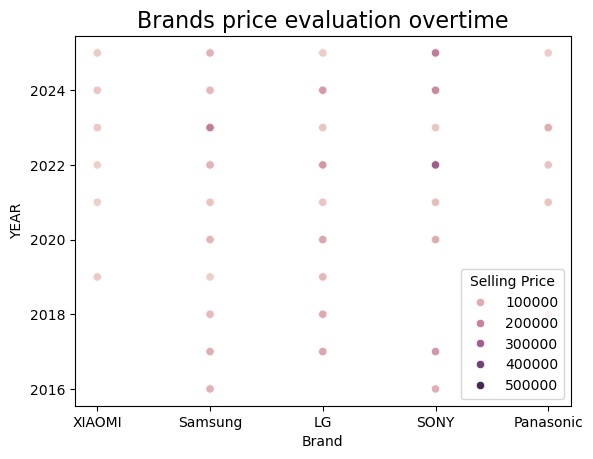

In [45]:
sns.scatterplot(data,x="Brand",y="YEAR",hue="Selling Price")
plt.title("Brands price evaluation overtime", 
          fontsize=16,           
          color='black')

# 13.Distribution of display types by year

In [1]:
# Distribution of display types by year
#types_year=data.groupby('YEAR')['LED Model'].value_counts()
#types_year

In [65]:
pd.crosstab(index=data["YEAR"],columns=data["LED Model"])

LED Model,LEDModel,Mini LEDModel,NanoCellModel,Neo QLEDModel,OLEDModel,QLEDModel,QNEDModel
YEAR,,,,,,,
2016,4,0,0,0,0,0,0
2017,2,0,0,0,1,2,0
2018,7,0,0,0,2,1,0
2019,13,0,0,0,2,2,0
2020,20,0,0,0,2,4,0
2021,39,0,0,0,5,9,0
2022,53,0,0,0,14,11,0
2023,42,0,0,7,4,5,0
2024,50,2,0,2,6,14,2


Text(0.5, 1.0, 'Models Evaluation overtime')

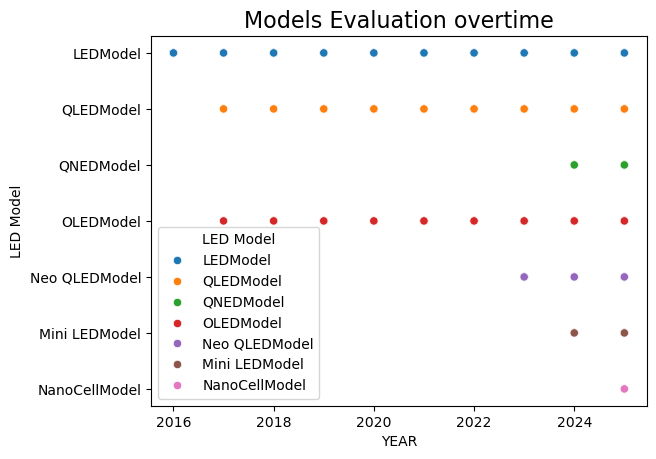

In [88]:
#lineplot
sns.scatterplot(data,x="YEAR",y="LED Model",hue="LED Model")
plt.title("Models Evaluation overtime",fontsize=16)

# 14.Compare average price per display type

In [161]:
# Compare average price per display type
display_type_prices = data.groupby('LED Model')['Selling Price'].mean().round(2).sort_values(ascending=False)
display_type_prices

LED Model
Mini LEDModel    275931.67
Neo QLEDModel    225730.00
OLEDModel        154863.02
QNEDModel        113942.25
NanoCellModel     97399.00
QLEDModel         76967.88
LEDModel          53319.18
Name: Selling Price, dtype: float64

Text(0.5, 1.0, 'Price Variation on Model')

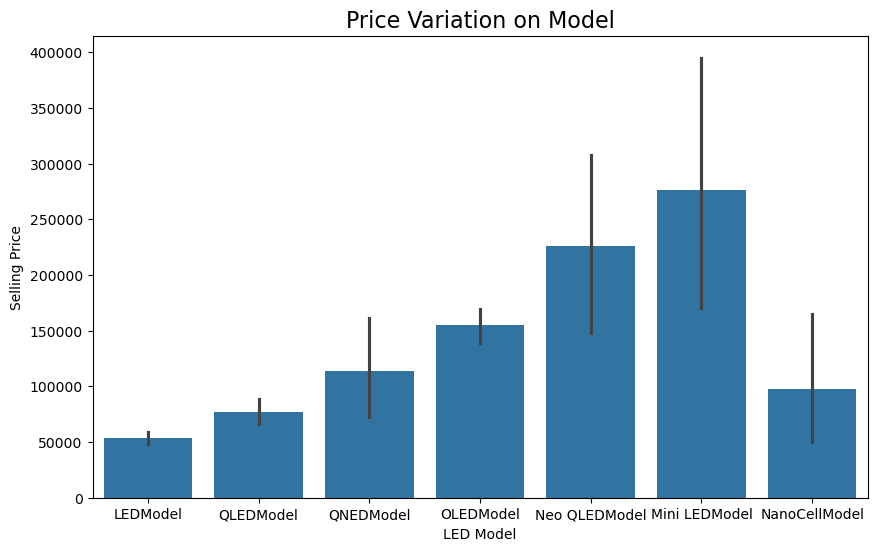

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(x='LED Model', y='Selling Price', data=data)
plt.title("Price Variation on Model", 
          fontsize=16)          
          

# 15.Study whether newer display techs (e.g., OLED) have larger screens or higher margins

In [52]:
# Study whether newer display techs (e.g., OLED) have larger screens or higher margins
display_screen_sizes = data.groupby('LED Model')['Inches_numeric'].mean()
display_screen_sizes

LED Model
LEDModel         51.625407
Mini LEDModel    73.833333
NanoCellModel    62.250000
Neo QLEDModel    63.666667
OLEDModel        59.346939
QLEDModel        54.812500
QNEDModel        63.375000
Name: Inches_numeric, dtype: float64

In [40]:
pd.pivot_table(data,values="Selling Price",index="Inches",columns="LED Model",aggfunc="mean").round(2)

LED Model,LEDModel,Mini LEDModel,NanoCellModel,Neo QLEDModel,OLEDModel,QLEDModel,QNEDModel
Inches,,,,,,,
24,11917.00,NaN,NaN,NaN,NaN,NaN,NaN
32,16715.91,NaN,NaN,NaN,NaN,13499.00,NaN
40,15700.00,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,87990.00,NaN,NaN
43,31433.41,NaN,39899.0,NaN,NaN,32418.18,50244.5
48,NaN,NaN,NaN,NaN,91279.00,NaN,NaN
49,46055.00,NaN,NaN,NaN,NaN,NaN,NaN
50,41077.87,NaN,NaN,NaN,NaN,52813.67,NaN
55,49945.11,122990.0,59899.0,97684.60,134124.73,68814.11,61990.0


Text(0.5, 1.0, 'Price Variation on Model & Inches')

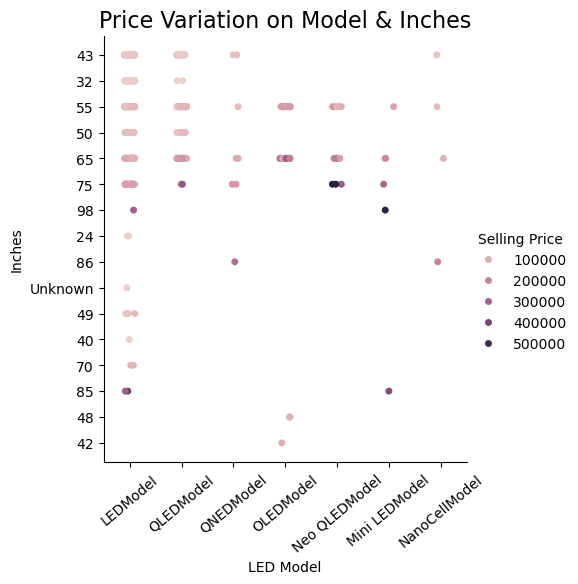

In [90]:

sns.catplot(data,x="LED Model",y="Inches",hue="Selling Price")
plt.xticks(rotation=40)
plt.title("Price Variation on Model & Inches", 
          fontsize=16)          
         
#count plot
#sns.countplot(data,x="LED Model",y="Inches",hue="Selling Price")

# 16.Analyze discounts and affordability trends over time

In [42]:
# Analyze discounts and affordability trends over time
discount_trends = data.groupby('YEAR')['Discount'].mean().round(2)
discount_trends

YEAR
2016    72.75
2017    60.40
2018    56.30
2019    44.94
2020    51.12
2021    37.57
2022    37.76
2023    33.79
2024    41.03
2025    34.95
Name: Discount, dtype: float64

Text(0.5, 1.0, 'Discount Evaluation over Years')

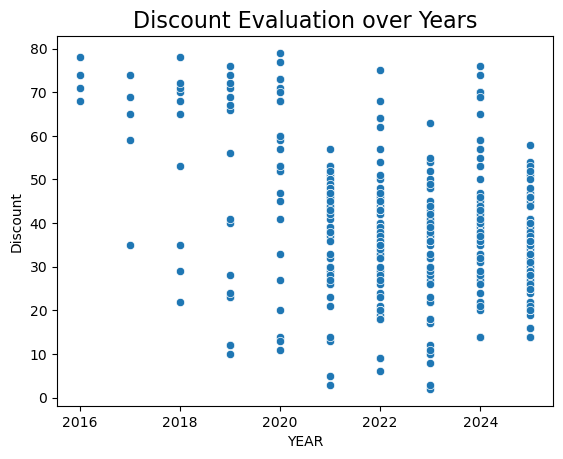

In [91]:
 #YEAR wise dicount variation
sns.scatterplot(x='YEAR', y='Discount', data=data) #we can use bar also
plt.title("Discount Evaluation over Years",
          fontsize=16)      
      
          

# 17.Compare profit margins across brands and years

In [44]:
# Compare profit margins across brands, display types, and years
profit_margins = data.groupby(['Brand', 'LED Model', 'YEAR'])['Profit Margin'].mean()
profit_margins

Brand   LED Model  YEAR
LG      LEDModel   2017   -125991.000000
                   2018    -83567.000000
                   2019    -75806.000000
                   2020   -122798.166667
                   2021    -28918.000000
                               ...      
XIAOMI  LEDModel   2023    -16796.375000
                   2024    -12567.400000
                   2025    -14173.076923
        QLEDModel  2024    -32281.000000
                   2025    -21250.000000
Name: Profit Margin, Length: 71, dtype: float64

In [86]:
pd.pivot_table(data,index="Brand",columns="YEAR",values="Profit Margin",aggfunc="mean")

YEAR,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
Brand,,,,,,,,,,
LG,NaN,-168721.5,-188779.0,-100122.9,-138112.071429,-50036.217391,-50925.281250,-11179.571429,-67321.363636,-62194.034483
Panasonic,NaN,NaN,-12301.0,NaN,NaN,-36200.000000,35700.000000,-34501.111111,NaN,-9238.500000
SONY,-271697.0,-80388.0,NaN,NaN,-25872.000000,-79736.750000,-87429.894737,-82274.000000,-63453.200000,-94617.933333
Samsung,-145793.0,-286516.5,-230037.0,-108947.0,-46637.900000,-52130.458333,-98344.458333,-35644.041667,-48830.306122,-34848.452830
XIAOMI,NaN,NaN,NaN,-17374.5,NaN,-14299.000000,-20325.000000,-16796.375000,-15853.000000,-16650.000000


Text(0.5, 1.0, 'Profits by Brand & Year')

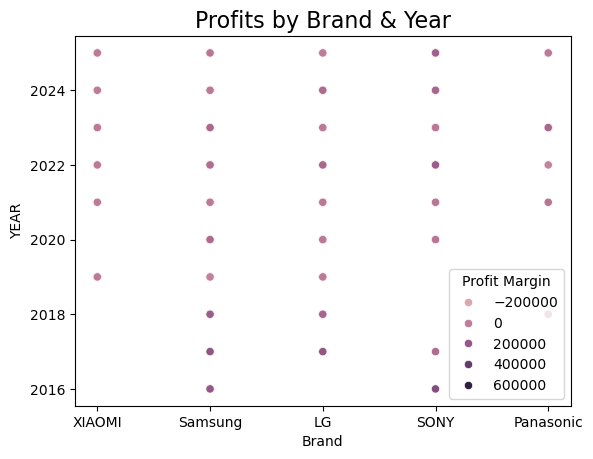

In [92]:
sns.scatterplot(data,x="Brand",y="YEAR",hue="Profit Margin")
plt.title("Profits by Brand & Year",fontsize=16)

# 18.Compare profit margins across  display types, and years

In [17]:
pd.pivot_table(data,index="LED Model",columns="YEAR",values="Profit Margin",aggfunc="mean")

YEAR,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
LED Model,,,,,,,,,,
LEDModel,177269.0,103189.5,131283.285714,50827.538462,81220.05,36360.641026,42162.000000,15237.904762,43821.480000,21034.320513
Mini LEDModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125335.000000,162285.000000
NanoCellModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59978.500000
Neo QLEDModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93418.857143,129848.500000,55263.500000
OLEDModel,NaN,211452.0,293991.000000,197390.500000,229995.50,126061.800000,111622.928571,37785.000000,77738.166667,114857.846154
QLEDModel,NaN,286516.5,192901.000000,171014.500000,91825.00,80337.333333,168971.545455,51722.000000,43329.857143,30119.718750
QNEDModel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44191.000000,78833.333333


Text(0.5, 1.0, 'Profits by Model & Year')

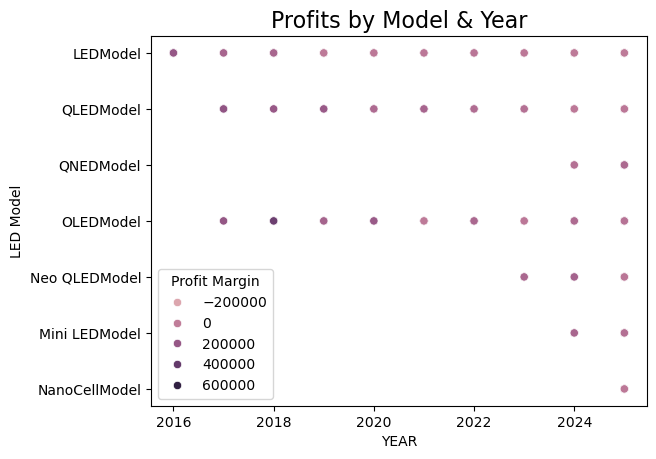

In [18]:
sns.scatterplot(data,x="YEAR",y="LED Model",hue="Profit Margin")
plt.title("Profits by Model & Year",fontsize=16)

# 19.Compare profit margins across brands and display types

In [21]:
pd.pivot_table(data,index="LED Model",columns="Brand",values="Profit Margin",aggfunc="mean").round(2)

Brand,LG,Panasonic,SONY,Samsung,XIAOMI
LED Model,,,,,
LEDModel,45714.44,15611.78,67693.26,38332.70,15003.37
Mini LEDModel,NaN,NaN,149968.33,NaN,NaN
NanoCellModel,59978.50,NaN,NaN,NaN,NaN
Neo QLEDModel,NaN,NaN,NaN,83014.00,NaN
OLEDModel,131051.06,110031.00,134520.00,64364.29,NaN
QLEDModel,NaN,NaN,NaN,85480.98,21985.40
QNEDModel,70172.75,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Profits by Brand & Model')

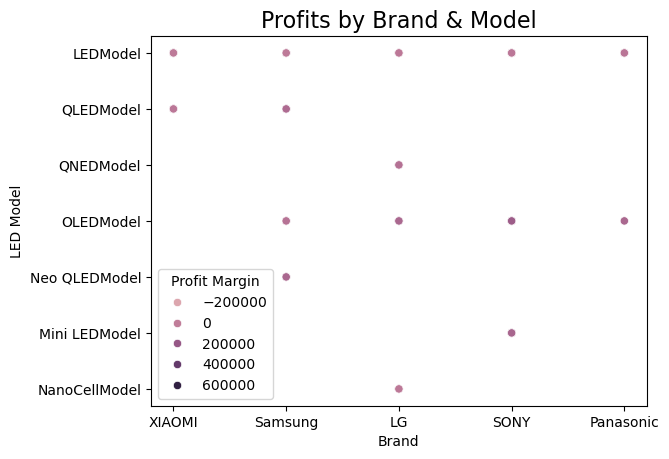

In [94]:
sns.scatterplot(data,x="Brand",y="LED Model",hue="Profit Margin")
plt.title("Profits by Brand & Model",fontsize=16)

# 20.Correlate screen size (inches) with profit margin

In [9]:
# Correlate screen size (inches) with profit margin
screen_size_profit = data.groupby('Inches_numeric')['Profit Margin'].mean().round(2)
screen_size_profit

Inches_numeric
24.0      3883.00
32.0      5871.33
40.0     14299.00
42.0     52000.00
43.0     16895.88
48.0     59061.00
49.0     84745.00
50.0     25634.72
55.0     55007.68
65.0     93109.83
70.0     66231.00
75.0    154211.92
85.0     42333.33
86.0    152420.50
98.0    316660.00
Name: Profit Margin, dtype: float64

In [2]:
#data.groupby('Inches')['Profit Margin'].mean().round(2)

Text(0.5, 1.0, 'Profits by Screensize')

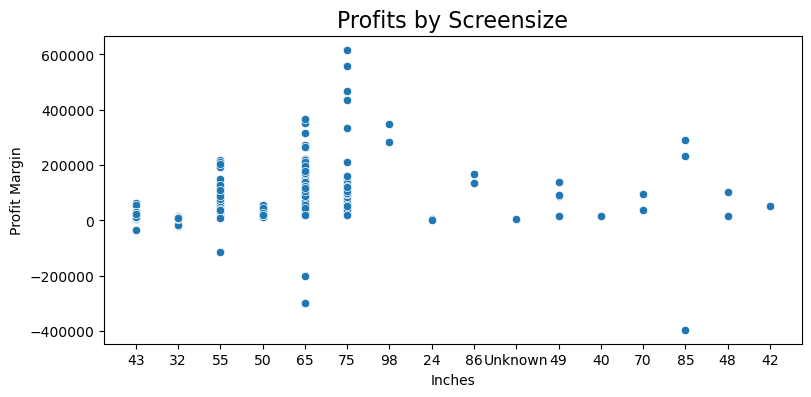

In [98]:
#sns.histplot(data,x="Inches",y="Profit Margin")
#scatter
plt.figure(figsize=(9,4))
sns.scatterplot(data,x="Inches",y="Profit Margin")
plt.title("Profits by Screensize",fontsize=16)